In [ ]:
import pandas as pd
df = pd.read_csv('/content/temperatures.csv')
df.shape

(117, 18)

In [ ]:
print(df.head)

<bound method NDFrame.head of      YEAR    JAN    FEB    MAR    APR    MAY    JUN    JUL    AUG    SEP  \
0    1901  22.40  24.14  29.07  31.91  33.41  33.18  31.21  30.39  30.47   
1    1902  24.93  26.58  29.77  31.78  33.73  32.91  30.92  30.73  29.80   
2    1903  23.44  25.03  27.83  31.39  32.91  33.00  31.34  29.98  29.85   
3    1904  22.50  24.73  28.21  32.02  32.64  32.07  30.36  30.09  30.04   
4    1905  22.00  22.83  26.68  30.01  33.32  33.25  31.44  30.68  30.12   
..    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
112  2013  24.56  26.59  30.62  32.66  34.46  32.44  31.07  30.76  31.04   
113  2014  23.83  25.97  28.95  32.74  33.77  34.15  31.85  31.32  30.68   
114  2015  24.58  26.89  29.07  31.87  34.09  32.48  31.88  31.52  31.55   
115  2016  26.94  29.72  32.62  35.38  35.72  34.03  31.64  31.79  31.66   
116  2017  26.45  29.46  31.60  34.95  35.84  33.82  31.88  31.72  32.22   

       OCT    NOV    DEC  ANNUAL  JAN-FEB  MAR-MAY  JUN-S

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
df.isnull().sum()

,0
YEAR,0
JAN,0
FEB,0
MAR,0
APR,0
MAY,0
JUN,0
JUL,0
AUG,0
SEP,0


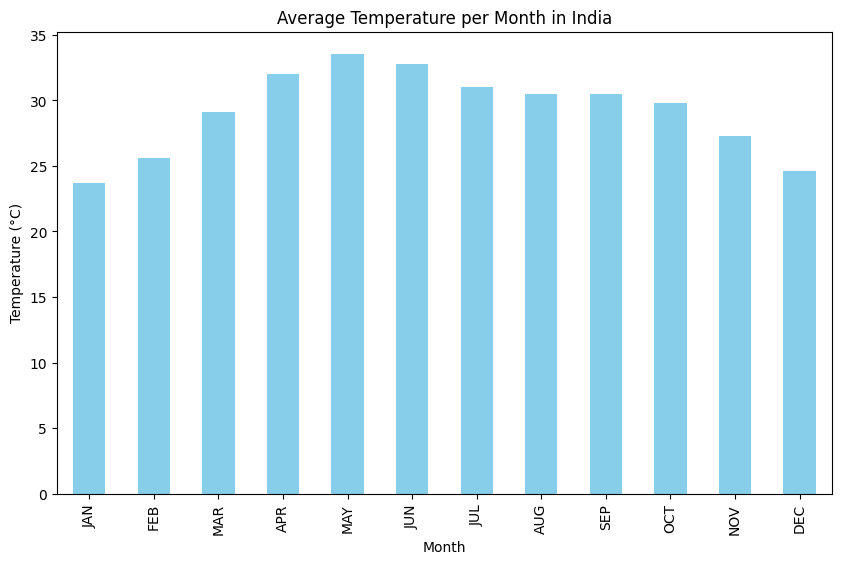

In [ ]:
import matplotlib.pyplot as plt

#months = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
months = df.iloc[:, 1:13].columns.tolist()


# Calculate mean temperature for each month across years
mean_temps = df[months].mean()

# Plot
plt.figure(figsize=(10,6))
mean_temps.plot(kind='bar', color='skyblue')
plt.title('Average Temperature per Month in India')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.show()

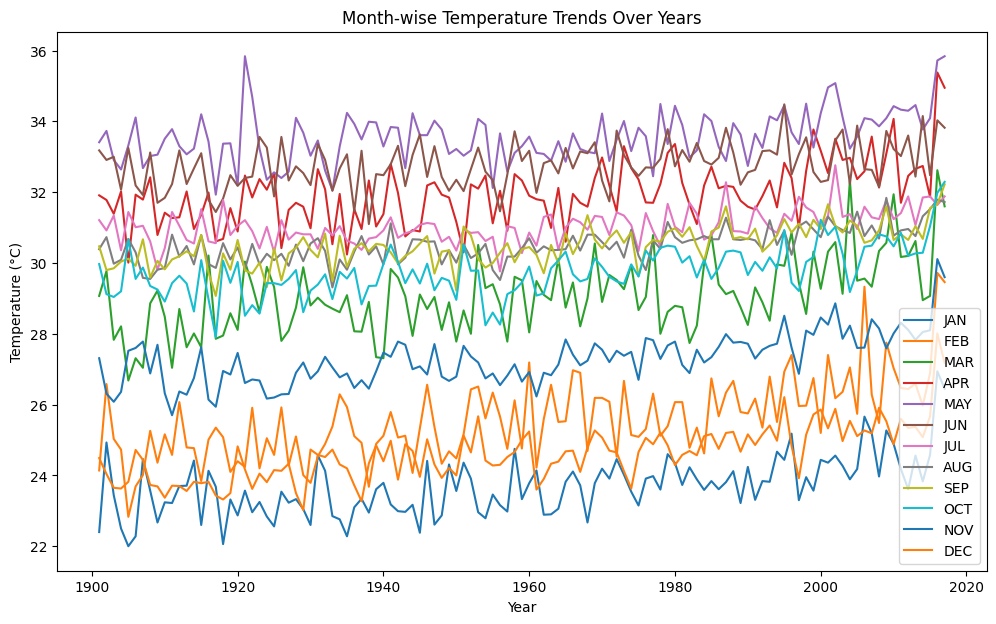

In [ ]:
plt.figure(figsize=(12,7))

for month in months:
    plt.plot(df['YEAR'], df[month], label=month)

plt.title('Month-wise Temperature Trends Over Years')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

In [ ]:
df.describe()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JAN-FEB,MAR-MAY,JUN-SEP,OCT-DEC
count,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000
mean,1959.000000,23.687436,25.597863,29.085983,31.975812,33.565299,32.774274,31.035897,30.507692,30.486752,29.766581,27.285470,24.608291,29.181368,24.629573,31.517607,31.198205,27.208120
std,33.919021,0.834588,1.150757,1.068451,0.889478,0.724905,0.633132,0.468818,0.476312,0.544295,0.705492,0.714518,0.782644,0.555555,0.911239,0.740585,0.420508,0.672003
min,1901.000000,22.000000,22.830000,26.680000,30.010000,31.930000,31.100000,29.760000,29.310000,29.070000,27.900000,25.700000,23.020000,28.110000,22.250000,29.920000,30.240000,25.740000
25%,1930.000000,23.100000,24.780000,28.370000,31.460000,33.110000,32.340000,30.740000,30.180000,30.120000,29.380000,26.790000,24.040000,28.760000,24.110000,31.040000,30.920000,26.700000
50%,1959.000000,23.680000,25.480000,29.040000,31.950000,33.510000,32.730000,31.000000,30.540000,30.520000,29.780000,27.300000,24.660000,29.090000,24.530000,31.470000,31.190000,27.210000
75%,1988.000000,24.180000,26.310000,29.610000,32.420000,34.030000,33.180000,31.330000,30.760000,30.810000,30.170000,27.720000,25.110000,29.470000,25.150000,31.890000,31.400000,27.610000
max,2017.000000,26.940000,29.720000,32.620000,35.380000,35.840000,34.480000,32.760000,31.840000,32.220000,32.290000,30.110000,28.010000,31.630000,28.330000,34.570000,32.410000,30.030000


In [ ]:
months = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
df_months = df[['YEAR'] + months]


df_long = df_months.melt(id_vars='YEAR', var_name='Month', value_name='Temperature')


df_long.dropna(inplace=True)


month_map = {'JAN':1, 'FEB':2, 'MAR':3, 'APR':4, 'MAY':5, 'JUN':6,
             'JUL':7, 'AUG':8, 'SEP':9, 'OCT':10, 'NOV':11, 'DEC':12}

df_long['Month_num'] = df_long['Month'].map(month_map)

In [ ]:
df_long

,YEAR,Month,Temperature,Month_num
0,1901,JAN,22.40,1
1,1902,JAN,24.93,1
2,1903,JAN,23.44,1
3,1904,JAN,22.50,1
4,1905,JAN,22.00,1
...,...,...,...,...
1399,2013,DEC,25.37,12
1400,2014,DEC,25.08,12
1401,2015,DEC,25.67,12
1402,2016,DEC,28.01,12


In [ ]:
#define X and Y
X = df_long[['Month_num']]
Y = df_long['Temperature']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
lr = LinearRegression()
lr.fit(X, Y)

LinearRegression()

In [ ]:
Y_pred = lr.predict(X)

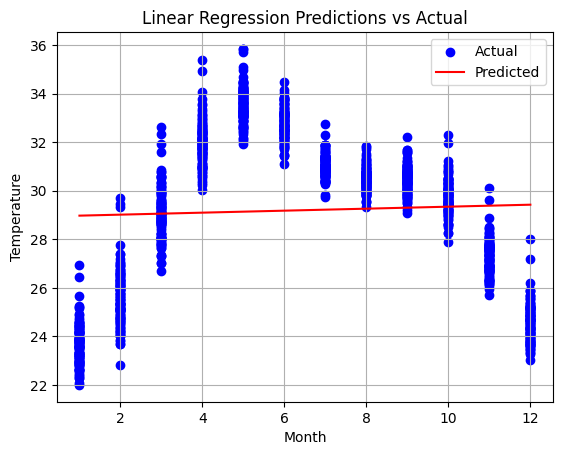

In [ ]:
plt.scatter(X, Y, color='blue', label='Actual')
plt.plot(X, Y_pred, color='red', label='Predicted')
plt.xlabel('Month')
plt.ylabel('Temperature')
plt.title('Linear Regression Predictions vs Actual')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
print("MSE:", mean_squared_error(Y, Y_pred))
print("MAE:", mean_absolute_error(Y, Y_pred))
print("R2:", r2_score(Y, Y_pred))


MSE: 10.138413546423767
MAE: 2.6878642126576593
R2: 0.001971797874375514


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

x = df_long[['Month']]
y = df_long['Temperature']

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=1)

dt_model = DecisionTreeRegressor()
dt_model.fit(x, y)

DecisionTreeRegressor()

In [ ]:
Y_pred = dt_model.predict(X)

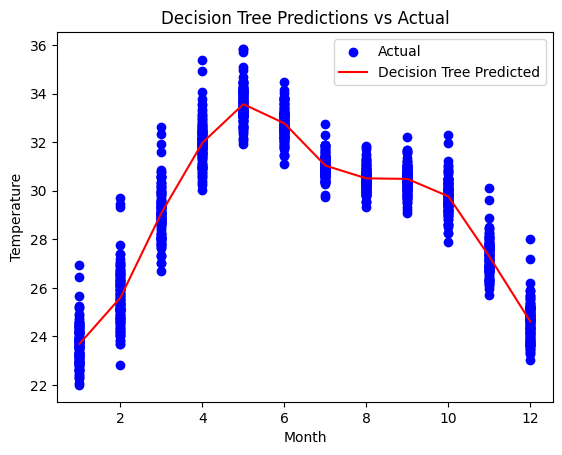

In [ ]:
plt.scatter(x, y, color='blue', label='Actual')
plt.plot(X, Y_pred, color='red', label='Decision Tree Predicted')
plt.xlabel('Month')
plt.ylabel('Temperature')
plt.title('Decision Tree Predictions vs Actual')
plt.legend()
plt.show()

In [ ]:
print("MSE:", mean_squared_error(y, Y_pred))
print("MAE:", mean_absolute_error(y, Y_pred))
print("R2:", r2_score(y, Y_pred))


MSE: 0.5984728614215794
MAE: 0.5776461635863344
R2: 0.9410861678535252


In [ ]:
rf = RandomForestRegressor()
rf.fit(X, Y)

RandomForestRegressor()

In [ ]:
y_pred_rf = rf.predict(X)

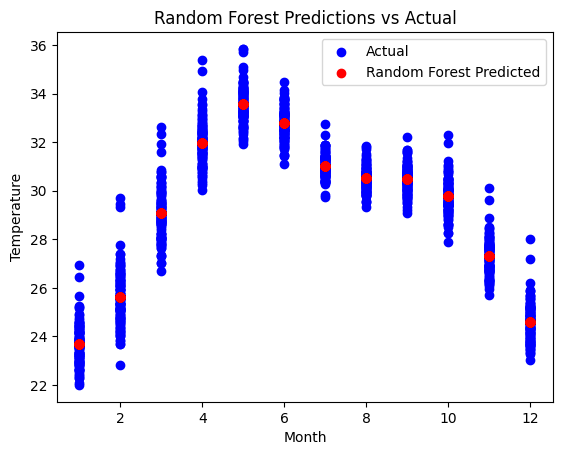

In [ ]:
plt.scatter(X, Y, color='blue', label='Actual')
plt.scatter(X, y_pred_rf, color='red', label='Random Forest Predicted')
plt.xlabel('Month')
plt.ylabel('Temperature')
plt.title('Random Forest Predictions vs Actual')
plt.legend()
plt.show()

In [ ]:
print("MSE:", mean_squared_error(Y, y_pred_rf))
print("MAE:", mean_absolute_error(Y, y_pred_rf))
print("R2:", r2_score(Y, y_pred_rf))


MSE: 0.598545325004303
MAE: 0.577644354437654
R2: 0.9410790345186247


In [ ]:
results = {
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest'],
    'MSE': [10.1384, 0.5984, 0.5342],
    'MAE': [2.6878, 0.5776, 0.5627],
    'R2': [0.0019, 0.9410, 0.9471]
}

results_df = pd.DataFrame(results)
display(results_df)

,Model,MSE,MAE,R2
0,Linear Regression,10.1384,2.6878,0.0019
1,Decision Tree,0.5984,0.5776,0.9410
2,Random Forest,0.5342,0.5627,0.9471
